In [3]:
#1. what is the total number of patients?

In [4]:
#2. what is the patient population distributed by gender?

In [5]:
#3. patient's Age-group by total visit

In [6]:
#4. which disease are most commonly diagnosed among the patients?

In [7]:
#5. Are certain diseases more prevalent in one gender compared to the other?

In [7]:
#6. Calculate the duration of each patient stay and create a group to show numbers of patients in each group.

In [7]:
#7. For any record with a recorded course of death, analyze pattern to identify risk factor

In [7]:
#8. what are the percentage of the following patients: Deceased, under-treatment and Recovered patients?

In [7]:
#9. what are the peak days of the week on a monthly bases for admissions and discharges?

In [7]:
#10. what is the total number of patients admitted and discharged per week, month/year, and year? Add a filter to filter the month by year

### Reading data from csv

### 1. what is th total number of patients?

In [16]:
import pandas as pd

# Load data from CSV
health_data = pd.read_csv("C:\\Users\\Hritick Jha\\Data Science and Analytics for Healthcare Market Trends\\Health care Data Analysis with python\\Health_dataset.csv")

# Display the first few rows
print(health_data.head(20))


   Patient ID  Gender         Disease         Treatment  \
0   PAT-00001    Male    Tuberculosis          Dialysis   
1   PAT-00002  Female         Malaria          Dialysis   
2   PAT-00003  Female         Malaria           Surgery   
3   PAT-00004    Male          Asthma          Dialysis   
4   PAT-00005  Female        Diabetes  Physical Therapy   
5   PAT-00006    Male   Heart Disease          Dialysis   
6   PAT-00007  Female    Tuberculosis          Dialysis   
7   PAT-00008  Female   Heart Disease          Dialysis   
8   PAT-00009  Female          Cancer          Dialysis   
9   PAT-00010  Female         Malaria          Dialysis   
10  PAT-00011    Male          Asthma           Surgery   
11  PAT-00012    Male  Kidney Failure      Chemotherapy   
12  PAT-00013    Male        HIV/AIDS  Physical Therapy   
13  PAT-00014    Male   Heart Disease          Dialysis   
14  PAT-00015    Male          Cancer  Physical Therapy   
15  PAT-00016    Male    Tuberculosis  Physical Therapy 

In [18]:
# count the number of patients
total_records = health_data.shape[0]

# What is the total number of patients?
print("Total patients", total_records)

Total patients 8000


### 2. what is the patient population distributed by gender?

In [6]:
import pandas as pd

# Load data from CSV
file_path = "C:\\Users\\Hritick Jha\\Data Science and Analytics for Healthcare Market Trends\\Health care Data Analysis with python\\Health_dataset.csv"

try:
    health_data = pd.read_csv(file_path)  # ✅ Ensure the dataset is loaded

    # Check if 'Gender' column exists
    if 'Gender' in health_data.columns:
        Gender_Count = health_data['Gender'].value_counts()
        print("Gender Distribution:")
        print(Gender_Count)
    else:
        print("Error: 'Gender' column not found in dataset.")
except FileNotFoundError:
    print("Error: The file was not found. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



Gender Distribution:
Gender
Male      5206
Female    2794
Name: count, dtype: int64


Available columns: Index(['Patient ID', 'Gender', 'Disease', 'Treatment', 'Hospital',
       'Admission Date', 'Discharge Date', 'Treatment Status',
       'Cause of Death', 'Date of Birth'],
      dtype='object')


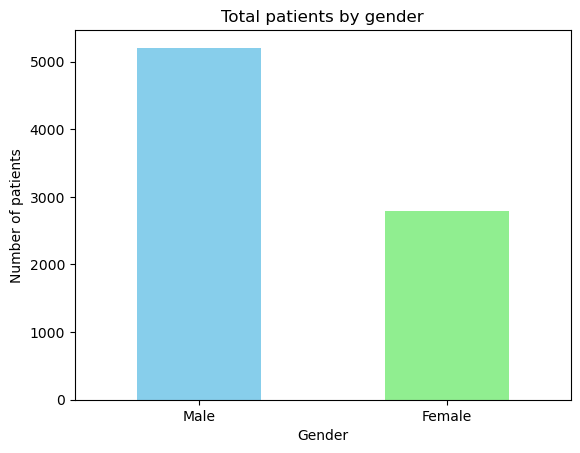

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv"

try:
    # Load the dataset
    health_data = pd.read_csv(file_path)
    
    # Display available columns (for debugging)
    print("Available columns:", health_data.columns)
    
    # Ensure 'Gender' column exists
    if 'Gender' in health_data.columns:
        gender_count = health_data['Gender'].value_counts()  # ✅ Fixed variable name

        # Visualize gender distribution
        gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])
        
        plt.title("Total patients by gender")  # ✅ plt.title should be a function
        plt.xlabel("Gender")
        plt.ylabel("Number of patients")
        plt.xticks(rotation=0)
        
        plt.show()
    else:
        print("Error: 'Gender' column not found in dataset.")

except FileNotFoundError:
    print("Error: The file was not found. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


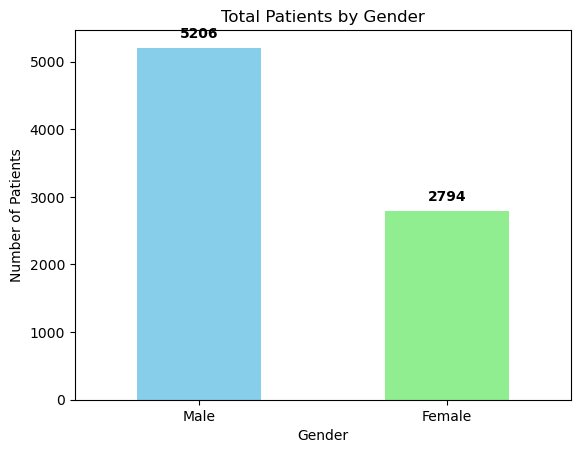

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv"

try:
    # Load the dataset
    health_data = pd.read_csv(file_path)

    # Ensure 'Gender' column exists
    if 'Gender' in health_data.columns:
        gender_count = health_data['Gender'].value_counts()

        # Create bar plot
        ax = gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])

        # Title & labels
        plt.title("Total Patients by Gender")
        plt.ylabel("Number of Patients")
        plt.xticks(rotation=0)

        # Add data labels before plt.show()
        for bar in ax.patches:
            height = bar.get_height()
            ax.annotate(
                str(int(height)),  # Convert height to integer
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

        # Show plot
        plt.show()

    else:
        print("Error: 'Gender' column not found in dataset.")

except FileNotFoundError:
    print("Error: The file was not found. Check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


### 3. patient's Age-group by total visit
 
  

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


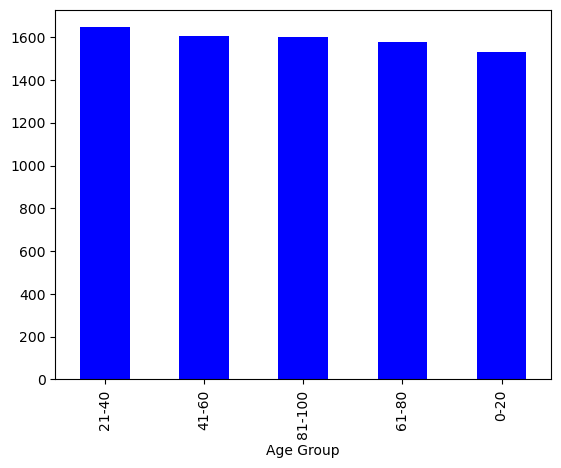

In [22]:
# convert the Admission date and Date of birth to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

#calculate the patients age as of the time of Admission in year
health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days /365.25
health_data['Age'] = health_data['Age'].astype(int)

# Dinfine age bins
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']

# create an age group using the bins var diffined
health_data['Age Group'] = pd.cut(health_data['Age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age group
age_count = health_data['Age Group']. value_counts()

# visualize the age group
ax = age_count.plot(kind='bar', color='blue')
print(age_count)


### 4. which disease are most commonly diagnosed among the patients?

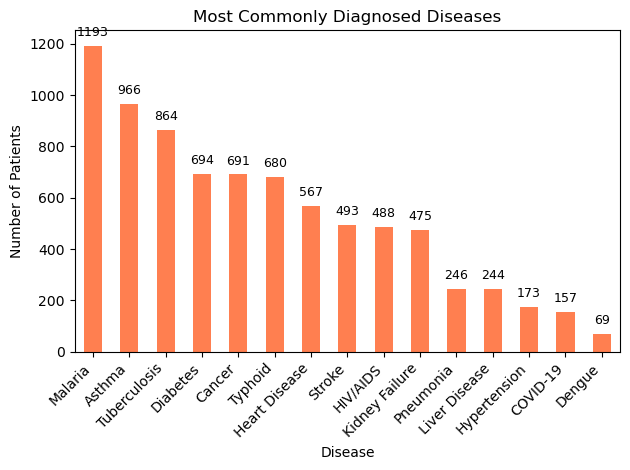

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv"

try:
    health_data = pd.read_csv(file_path)

    # Step 2: Check if 'Disease' column exists
    if 'Disease' in health_data.columns:
        # Step 3: Count the number of occurrences of each disease
        disease_counts = health_data['Disease'].value_counts()

        # Step 4: Plot
        ax = disease_counts.plot(kind='bar', color='coral')
        plt.title("Most Commonly Diagnosed Diseases")
        plt.xlabel("Disease")
        plt.ylabel("Number of Patients")
        plt.xticks(rotation=45, ha='right')

        # Step 5: Add data labels
        for bar in ax.patches:
            height = bar.get_height()
            ax.annotate(
                str(int(height)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=9
            )

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()
    else:
        print("Error: 'Disease' column not found in dataset.")

except FileNotFoundError:
    print("Error: File not found. Check your file path.")
except Exception as e:
    print(f"An error occurred: {e}")


In [6]:
disease_count = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
print("Top 3 most commonly diagnosed diseases:")
print(disease_count)


Top 3 most commonly diagnosed diseases:
Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [12]:
disease_count = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_top3 = disease_count.sum()  # Use .sum(), not .Sum()
format_value = "{:,}".format(total_top3)
print("Total Count of the 3 most common diseases:", format_value)


Total Count of the 3 most common diseases: 3,023


In [20]:
dynamictop = 7
disease_count = health_data['Disease'].value_counts().nlargest(dynamictop)  # Get the top 7 diseases
total_top7 = disease_count.sum()
formal_value = "{:,}".format(total_top)
description = f"Total count of the {dynamictop} most common diseases:"
print(description, formal_value)

Total count of the 7 most common diseases: 5,655


In [21]:
disease_count = health_data['Disease'].value_counts().nlargest(3) #Get the top 3 disease
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [22]:
disease_count = health_data['Disease'].value_counts().nsmallest(3) #Get the top 3 disease
print(disease_count)

Disease
Dengue           69
COVID-19        157
Hypertension    173
Name: count, dtype: int64


In [23]:
disease_count = health_data['Disease'].value_counts().nlargest(3) #Get the top 3 disease
total_diseases_count = health_data['Disease'].value_counts().sum()
print(total_diseases_count)

8000


In [24]:
disease_count = health_data['Disease'].value_counts().nlargest(3) #Get the top 3 disease
total_diseases_count = health_data['Disease'].value_counts().sum()
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [27]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseases_count = health_data['Disease'].value_counts().sum()     # Total of all diseases

# Calculate the percentage share of top 3 diseases
percentage = (disease_counttop3 / total_diseases_count) * 100
print(percentage)



Disease
Malaria         14.9125
Asthma          12.0750
Tuberculosis    10.8000
Name: count, dtype: float64


In [28]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseases_count = health_data['Disease'].value_counts().sum()     # Total of all diseases

# Calculate the percentage share of top 3 diseases
percentage = (disease_counttop3 / total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)
print(roundpercentage)


Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int32


In [30]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseases_count = health_data['Disease'].value_counts().sum()     # Total of all diseases

# Calculate the percentage share of top 3 diseases
percentage = (disease_counttop3 / total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {roundpercentage}%")


Malaria: Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int32%
Asthma: Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int32%
Tuberculosis: Disease
Malaria         15
Asthma          12
Tuberculosis    11
Name: count, dtype: int32%


In [31]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseases_count = health_data['Disease'].value_counts().sum()     # Total of all diseases

# Calculate the percentage share of top 3 diseases
percentage = (disease_counttop3 / total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")

Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [32]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseases_count = health_data['Disease'].value_counts().sum()     # Total of all diseases

# Calculate the percentage share of top 3 diseases
percentage = (disease_counttop3 / total_diseases_count) * 100
roundpercentage = percentage.round(0).astype(int)

for disease, anything in roundpercentage.items():
    print(f"{disease}: {anything}%")

Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [39]:
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)  # Get the top 3 diseases
total_diseasestop3count = disease_counttop3.sum()
# Calculate the percentage share of top 3 diseases

pcttop3 = (disease_counttop3/total_diseasestop3count)*100
roundpct = pcttop3.round(0).astype(int)

for disease, anything in roundpct.items():
    print(f"{disease}: {anything}%")



Malaria: 39%
Asthma: 32%
Tuberculosis: 29%



### 5. Are certain diseases more prevalent in one gender compared to the other?

In [41]:
gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])
print("Diseases that are common among genders")
print(gender_disease)

Diseases that are common among genders
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


### 6. Calculate the duration of each patient stay and create a group to show numbers of patients in each group.

In [47]:
# convert data in proper date data type
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Stay Duration'] = (df['Discharge Date'] - df['Admission Date']).dt.days
print(df[['Admission Date', 'Discharge Date' ,'Stay Duration']].head(10))

  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10-25     2022-10-30              5
5     2022-02-07     2022-02-15              8
6     2022-06-07     2022-06-30             23
7     2022-06-26     2022-06-27              1
8     2023-07-21     2023-08-07             17
9     2023-12-25     2024-01-05             11


### Group Stay Duration

In [53]:
bins = [-1, 0, 3, 7, 14, 20, float('inf')]
labels = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "15-20 Days", "Above 21 Days"]

# Apply cut
df['Stay Bucket'] = pd.cut(df['Stay Duration'], bins=bins, labels=labels, right=True)

# Show the result
print(df[['Stay Duration', 'Stay Bucket']].head())



   Stay Duration    Stay Bucket
0             28  Above 21 Days
1             23  Above 21 Days
2             29  Above 21 Days
3              4       4-7 Days
4              5       4-7 Days


In [54]:
bins = [-1, 0, 3, 7, 14, 20, float('inf')]
labels = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "15-20 Days", "Above 21 Days"]

# Apply cut
df['Stay Bucket'] = pd.cut(df['Stay Duration'], bins=bins, labels=labels, right=True)

# Show the result
print(df['Stay Bucket'])


0       Above 21 Days
1       Above 21 Days
2       Above 21 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 21 Days
7997        8-14 Days
7998    Above 21 Days
7999    Above 21 Days
Name: Stay Bucket, Length: 8000, dtype: category
Categories (6, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < '15-20 Days' < 'Above 21 Days']


#### Number of patient on each group

In [55]:
total_group_patient = df['Stay Bucket'].value_counts()
print(total_group_patient)

Stay Bucket
Above 21 Days    2682
8-14 Days        1837
15-20 Days       1587
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


### create chart to visualize it

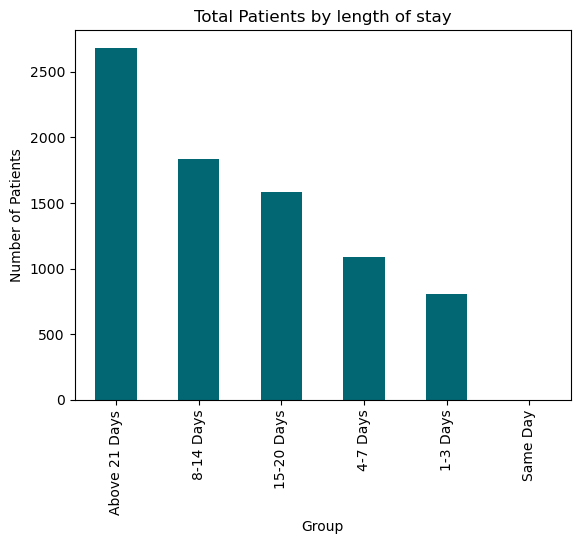

In [58]:
import matplotlib.pyplot as plt
total_group_patient.plot(kind='bar', color=['#026773'])  # Added comma
plt.title("Total Patients by length of stay")  # Optional: add a title
plt.ylabel("Number of Patients")
plt.xlabel("Group")
plt.show()


### 7.For any records with a recorded course of death, analyze pattern to identify risk factor

In [61]:
# Filter records where the cause of death is not empty
death_cause = df.dropna(subset=['Cause of Death'])

# Count the causes of death
count_cause = death_cause['Cause of Death'].value_counts()

print("Most common causes of death:")
print(count_cause)


Most common causes of death:
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


### visualize the finding

Text(0.5, 1.0, 'Top causes of Death')

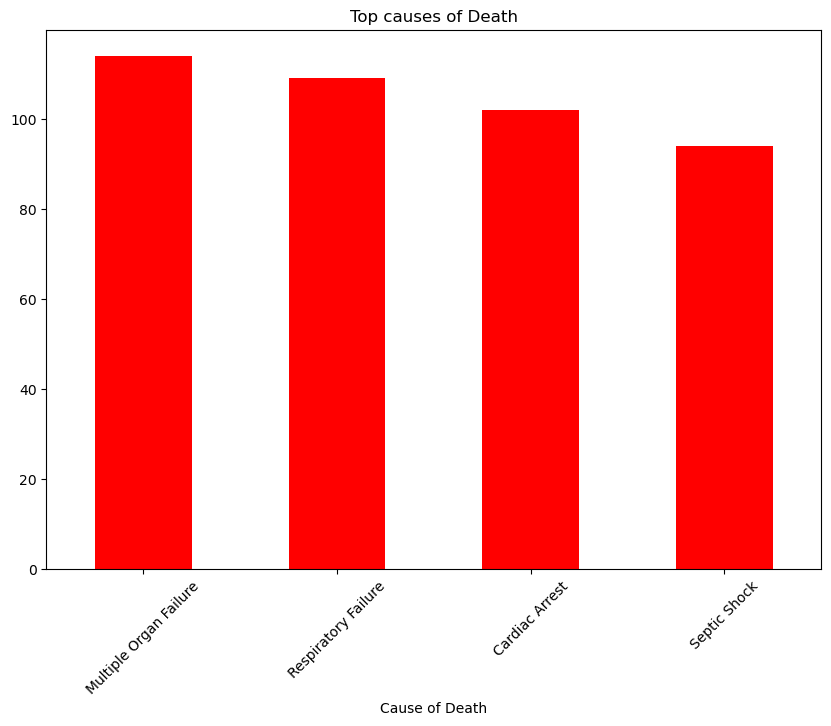

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
count_cause.plot(kind='bar',color='red')
plt.xticks(rotation=45)
plt.title("Top causes of Death")

### Connecting to data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = (r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv")
df = pd.read_csv(file_path)
df

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28
...,...,...,...,...,...,...,...,...,...,...
7995,PAT-07996,Male,HIV/AIDS,Radiotherapy,Sunrise Clinic,2022-06-28,2022-07-05,Recovered,NaN,1925-11-10
7996,PAT-07997,Female,Heart Disease,Chemotherapy,Sunrise Clinic,2022-01-28,2022-02-25,Recovered,NaN,2004-06-15
7997,PAT-07998,Male,Asthma,Dialysis,Sunrise Clinic,2022-09-14,2022-09-22,Recovered,NaN,1993-10-03
7998,PAT-07999,Male,Typhoid,Ventilation Support,Sunrise Clinic,2023-08-04,2023-08-25,Recovered,NaN,1999-02-01


### 8. what are the percentage of the following patients: Decreased, under-treatment and Recovered patients?

In [75]:
#Total patients
total_patients = df.shape[0]
total_patients

8000

In [76]:
#Total death patientents
total_death = (df['Treatment Status'].str.lower() == 'deceased').sum()
total_death

419

In [77]:
#percentage of deceased
death_rate = (total_death / total_patients) * 100 if total_patients > 0 else 0
death_rate

5.2375

In [81]:
print(f"total_patients:", total_patients)
print(f"total_death:", total_death)
print(f"death_rate:", death_rate)

total_patients: 8000
total_death: 419
death_rate: 5.2375


### Recovered Patients

In [88]:
# Total Recovered patientents
total_recovered = (df['Treatment Status'].str.lower() =='recovered').sum()

#percentage of deceased
recovered_rate = (total_recovered / total_patients) * 100 if total_patients > 0 else 0
total_recovered

6819

In [87]:
# Total Recovered patientents
total_recovered = (df['Treatment Status'].str.lower() =='recovered').sum()

#percentage of deceased
recovered_rate = (total_recovered / total_patients) * 100 if total_patients > 0 else 0
recovered_rate

85.2375

### Under Treatment patients


In [89]:
# All patients under treatment
under_treatment = 100 - (recovered_rate + death_rate)
under_treatment

9.525000000000006

### Show this as dought chat

In [90]:
print(f"Total recovery Rate:", recovered_rate)
print(f"Casuality Rate:", death_rate)
print(f"under treatment Rate:" , under_treatment)

Total recovery Rate: 85.2375
Casuality Rate: 5.2375
under treatment Rate: 9.525000000000006


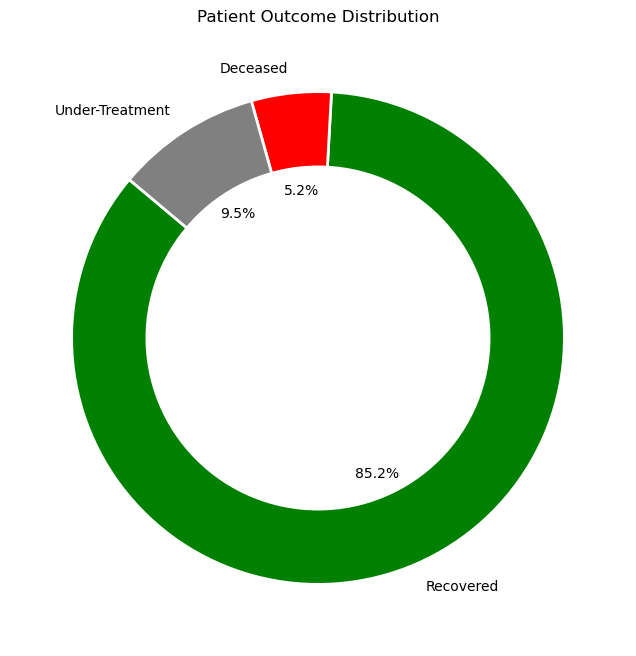

In [93]:
import matplotlib.pyplot as plt

labels = ['Recovered', 'Deceased', 'Under-Treatment']
sizes = [recovered_rate, death_rate, under_treatment]  # make sure these variables are defined
colors = ['green', 'red', 'gray']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # fixed typo here
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add a white center circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Patient Outcome Distribution")
plt.show()


### connect to Required libraries

In [94]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv")
df

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28
...,...,...,...,...,...,...,...,...,...,...
7995,PAT-07996,Male,HIV/AIDS,Radiotherapy,Sunrise Clinic,2022-06-28,2022-07-05,Recovered,NaN,1925-11-10
7996,PAT-07997,Female,Heart Disease,Chemotherapy,Sunrise Clinic,2022-01-28,2022-02-25,Recovered,NaN,2004-06-15
7997,PAT-07998,Male,Asthma,Dialysis,Sunrise Clinic,2022-09-14,2022-09-22,Recovered,NaN,1993-10-03
7998,PAT-07999,Male,Typhoid,Ventilation Support,Sunrise Clinic,2023-08-04,2023-08-25,Recovered,NaN,1999-02-01


### 9. what are the peak days of the week on a monthly bases for admissions and discharges?

In [95]:
# convert Admission date to proper date format
df['Admission Date'] = pd.to_datetime(df['Admission Date'],errors = "coerce")

# Extract the short day and month name
df['Admission Month'] = df['Admission Date'].dt.strftime('%b')
df['Admission day'] = df['Admission Date'].dt.strftime('%a')

# Difine proper order for month and abbreviated days
month_order = [
    'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','sep','oct','Nov','Dec' ]
day_order = [ 'Mon', 'Tue','wed','Thu','Fri','sat','sun']
day_order



['Mon', 'Tue', 'wed', 'Thu', 'Fri', 'sat', 'sun']

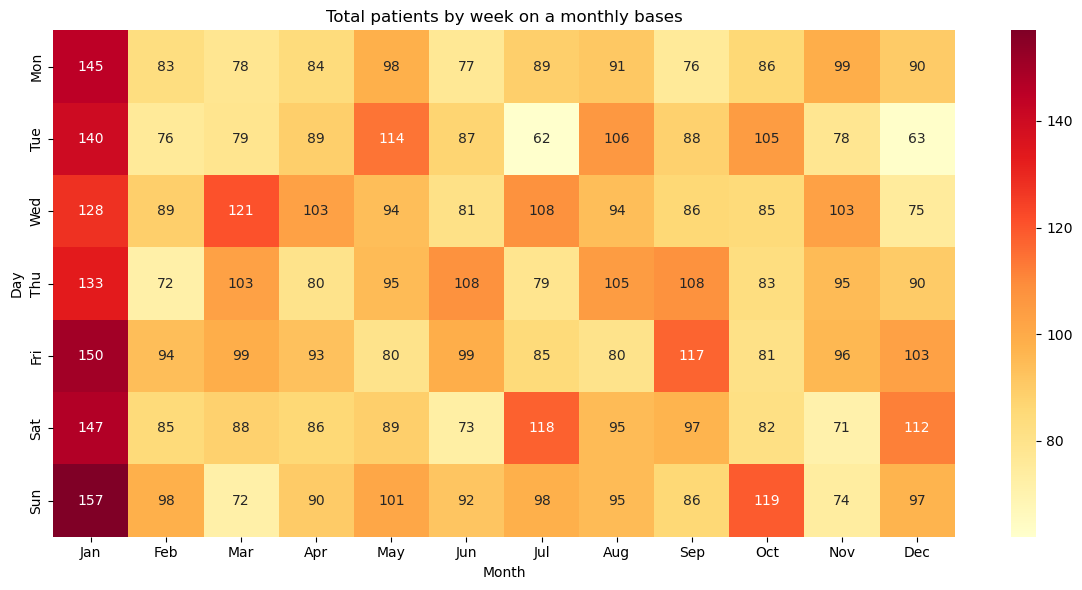

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load the dataset
# Replace the filename below with your actual file name
df = pd.read_csv(r"C:\Users\Hritick Jha\Data Science and Analytics for Healthcare Market Trends\Health care Data Analysis with python\Health_dataset.csv")  # 👈 Change this to your real file name

# STEP 2: Convert 'Admission Date' to datetime format
df['Admission Date'] = pd.to_datetime(df['Admission Date'], errors="coerce")

# STEP 3: Extract short month name and weekday name
df['Admission Month'] = df['Admission Date'].dt.strftime('%b')  # Jan, Feb, ...
df['Admission Day'] = df['Admission Date'].dt.strftime('%a')    # Mon, Tue, ...

# STEP 4: Define the order of months and days
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# STEP 5: Create the pivot table for heatmap
admission_heatmap = df.pivot_table(
    index='Admission Day',
    columns='Admission Month',
    aggfunc='size',
    fill_value=0
)

# STEP 6: Reindex to maintain proper order
admission_heatmap = admission_heatmap.reindex(index=day_order, columns=month_order)

# STEP 7: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(admission_heatmap, cmap='YlOrRd', annot=True, fmt="d")
plt.title('Total patients by week on a monthly bases')
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()








### 10. what is the total number of patients admitted per week, month and year? Add a filter to filter the month by year

In [24]:
# create a new column
df['Admission day'] = df['Admission Date'].dt.strftime('%a')

# Group data by the day name and count admissions
admission_by_day = df.groupby("Admission day").size()
admission_by_day

# start the name of day
day_order = ['Mon', 'Tue','wed','Thu','Fri','Sat','Sun']
admission_by_day = admission_by_day.reindex(day_order, fill_value=0)
admission_by_day


Admission day
Mon    1096
Tue    1087
wed       0
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

Admission day
Mon    1096
Tue    1087
wed       0
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

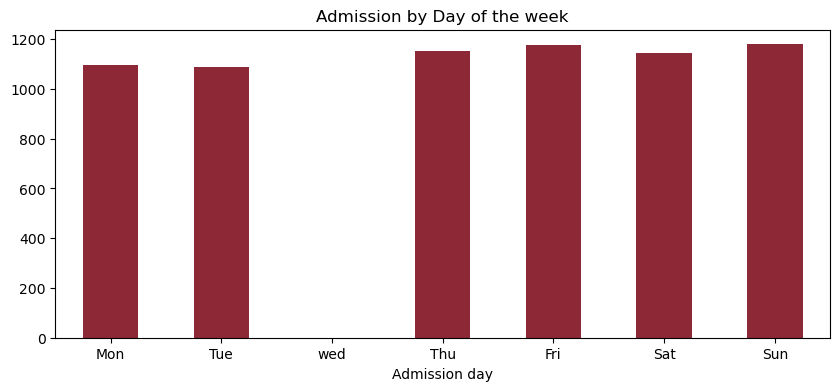

In [28]:
# create a visual
admission_by_day.plot(kind="bar", color="#8D2837",figsize=(10,4))
plt.title('Admission by Day of the week')
plt.xticks(rotation=0)
admission_by_day

In [30]:
# Top 3 days with high admission
top_3_admission_day = df['Admission day'].value_counts().nlargest(3)
top_3_admission_day

Admission day
Sun    1179
Fri    1177
Wed    1167
Name: count, dtype: int64

In [32]:
#bottom 3 days with high admission 
botton_3_admission_day = df['Admission day']. value_counts().nlargest(3)
botton_3_admission_day

Admission day
Sun    1179
Fri    1177
Wed    1167
Name: count, dtype: int64

### Total admission by month filtered by year

In [43]:
# filter using the year of admission
selected_year = 2022
df_year = df[df['Admission Date'].dt.year == selected_year].copy()

# Adding the month  column
df_year['Admission Month'] = df_year['Admission Date'].dt.month

# Month Name
df_year['Month Name'] = df_year['Admission Date'].dt.month_name()

#Total Admission on a monthly basis
monthly_admission = (
    df_year
    .groupby(['Admission Month', 'Month Name'])
    .size()
    .reset_index(name='Total patients')
    .sort_values('Admission Month')
)
print (f"Total patients admitted in the year {selected_year}")
monthly_admission

Total patients admitted in the year 2022


,Admission Month,Month Name,Total patients
0,1,January,351
1,2,February,291
2,3,March,313
3,4,April,327
4,5,May,349
5,6,June,315
6,7,July,327
7,8,August,329
8,9,September,311
9,10,October,311


### Create a line chart to visualize it

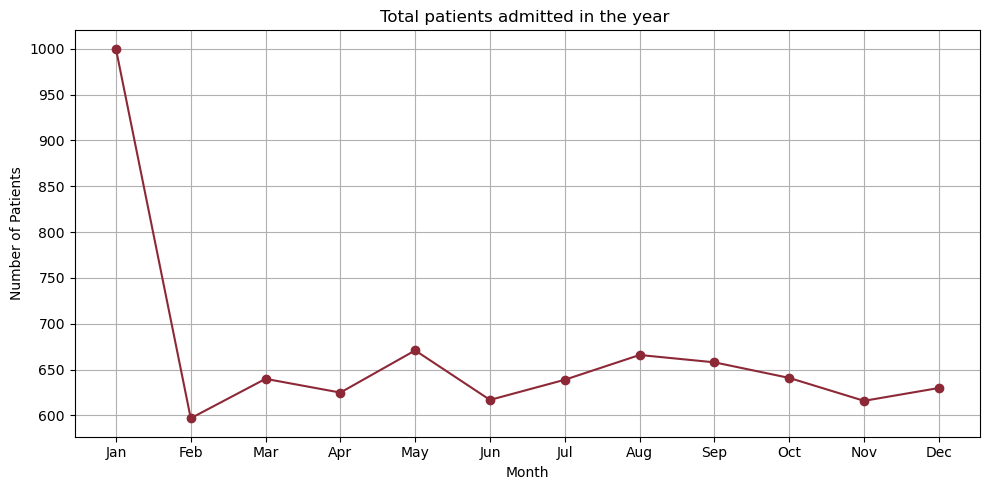

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and 'Admission Date' is parsed as datetime
df['Admission Date'] = pd.to_datetime(df['Admission Date'], errors="coerce")

# Extract month name and count patients per month
df['Month Name'] = df['Admission Date'].dt.strftime('%b')  # Jan, Feb, ...
monthly_admission = df['Month Name'].value_counts().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
).reset_index()
monthly_admission.columns = ['Month Name', '# patients']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_admission['Month Name'], monthly_admission['# patients'],
         marker='o', linestyle='-', color='#8D2837'
        )
plt.title("Total patients admitted in the year ")
plt.xlabel("Month")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.tight_layout()
plt.show()
